### Bibliotecas

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from datetime import datetime
import tensorflow as tf

### Carregando Dados

In [179]:
df_sf = pd.read_csv(r'/home/alexandre/Downloads/UFABC_Tambra/Dados/SoftFailure_dataset.csv')

### Preparação dos dados

#### Conversão para datetime

In [180]:
df_sf['Timestamp_s'] = pd.to_datetime(df_sf.Timestamp,unit='s')#[[0]]
df_sf['Timestamp_data'] = df_sf['Timestamp_s'].astype(str).str.split(expand=True)[0]
df_sf['Timestamp_hora'] = df_sf['Timestamp_s'].astype(str).str.split(expand=True)[1]

#### Replice Failure - NaN = 0 

In [181]:
df_sf.Failure = df_sf.Failure.replace(np.NaN,0).astype(int)

### Exploração dos dados

In [182]:
df_sf.head()

,Timestamp,Type,ID,BER,OSNR,InputPower,OutputPower,Failure,Timestamp_s,Timestamp_data,Timestamp_hora
0,1624457562,Devices,SPO1/18/11,2.310000e-08,38.6,NaN,NaN,0,2021-06-23 14:12:42,2021-06-23,14:12:42
1,1624457562,Infrastructure,Ampli1,NaN,NaN,-19.2,0.7,0,2021-06-23 14:12:42,2021-06-23,14:12:42
2,1624457562,Devices,SPO2/18/11,1.720000e-07,25.8,NaN,NaN,0,2021-06-23 14:12:42,2021-06-23,14:12:42
3,1624457562,Infrastructure,Ampli3,NaN,NaN,-16.7,0.8,0,2021-06-23 14:12:42,2021-06-23,14:12:42
4,1624457562,Infrastructure,Ampli2,NaN,NaN,-15.5,0.4,0,2021-06-23 14:12:42,2021-06-23,14:12:42


In [183]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53697 entries, 0 to 53696
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       53697 non-null  int64         
 1   Type            53697 non-null  object        
 2   ID              53697 non-null  object        
 3   BER             17899 non-null  float64       
 4   OSNR            17899 non-null  float64       
 5   InputPower      35798 non-null  float64       
 6   OutputPower     35798 non-null  float64       
 7   Failure         53697 non-null  int64         
 8   Timestamp_s     53697 non-null  datetime64[ns]
 9   Timestamp_data  53697 non-null  object        
 10  Timestamp_hora  53697 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 4.5+ MB


In [184]:
df_sf.describe()

,Timestamp,BER,OSNR,InputPower,OutputPower,Failure,Timestamp_s
count,5.369700e+04,1.789900e+04,17899.000000,35798.000000,35798.000000,53697.000000,53697
mean,1.624472e+09,7.251164e-06,31.621493,-19.016101,0.647648,0.095462,2021-06-23 18:13:34.512542720
min,1.624458e+09,1.480000e-08,18.100000,-29.100000,0.400000,0.000000,2021-06-23 14:12:42
25%,1.624465e+09,2.240000e-08,25.300000,-22.875000,0.700000,0.000000,2021-06-23 16:13:01
50%,1.624472e+09,1.160000e-07,26.300000,-17.950000,0.700000,0.000000,2021-06-23 18:13:41
75%,1.624479e+09,2.190000e-07,38.600000,-16.700000,0.700000,0.000000,2021-06-23 20:13:59
max,1.624486e+09,1.544550e-04,38.600000,-15.500000,0.800000,1.000000,2021-06-23 22:14:11
std,8.339434e+03,3.160527e-05,7.076795,3.309115,0.148368,0.293854,NaN


In [185]:
df_sf.corr(numeric_only=True)

,Timestamp,BER,OSNR,InputPower,OutputPower,Failure
Timestamp,1.000000,0.180563,-0.037079,-0.050614,-0.013532,0.257395
BER,0.180563,1.000000,-0.424597,NaN,NaN,0.636417
OSNR,-0.037079,-0.424597,1.000000,NaN,NaN,-0.131970
InputPower,-0.050614,NaN,NaN,1.000000,-0.428753,-0.209096
OutputPower,-0.013532,NaN,NaN,-0.428753,1.000000,-0.048795
Failure,0.257395,0.636417,-0.131970,-0.209096,-0.048795,1.000000


In [186]:
df_sf.Type.unique()

array(['Devices', 'Infrastructure'], dtype=object)

In [187]:
df_sf.ID.unique()

array(['SPO1/18/11', 'Ampli1', 'SPO2/18/11', 'Ampli3', 'Ampli2', 'Ampli4'],
      dtype=object)

<Axes: >

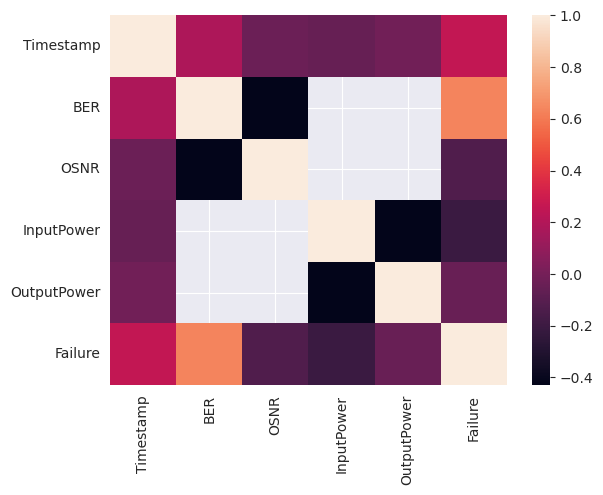

In [188]:
sns.heatmap(df_sf.corr(numeric_only=True))

### LIBS ML

In [189]:
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
import time
from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### LIBS APRENDIZADO

In [190]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

seed = 7

In [191]:
### Criando uma matriz de features (X) e o vetor de saída (y)

X = df_sf.drop(['Timestamp','Type','ID','Failure','Timestamp_s','Timestamp_data','Timestamp_hora'], axis=1)
y = df_sf['Failure']

### MACHINE LEARNING

#### Balanceamento dos dados

In [192]:
df_sf['Failure'].value_counts()

Failure
0    48571
1     5126
Name: count, dtype: int64

#### Balanceamento dos dados

In [193]:
from sklearn.preprocessing import StandardScaler

### Slanado os dados para consulta futura se necessário
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_features = X

### Normalização
X = StandardScaler().fit_transform(X)

In [194]:
### Divisão entre treino  e teste

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

<Figure size 500x500 with 0 Axes>

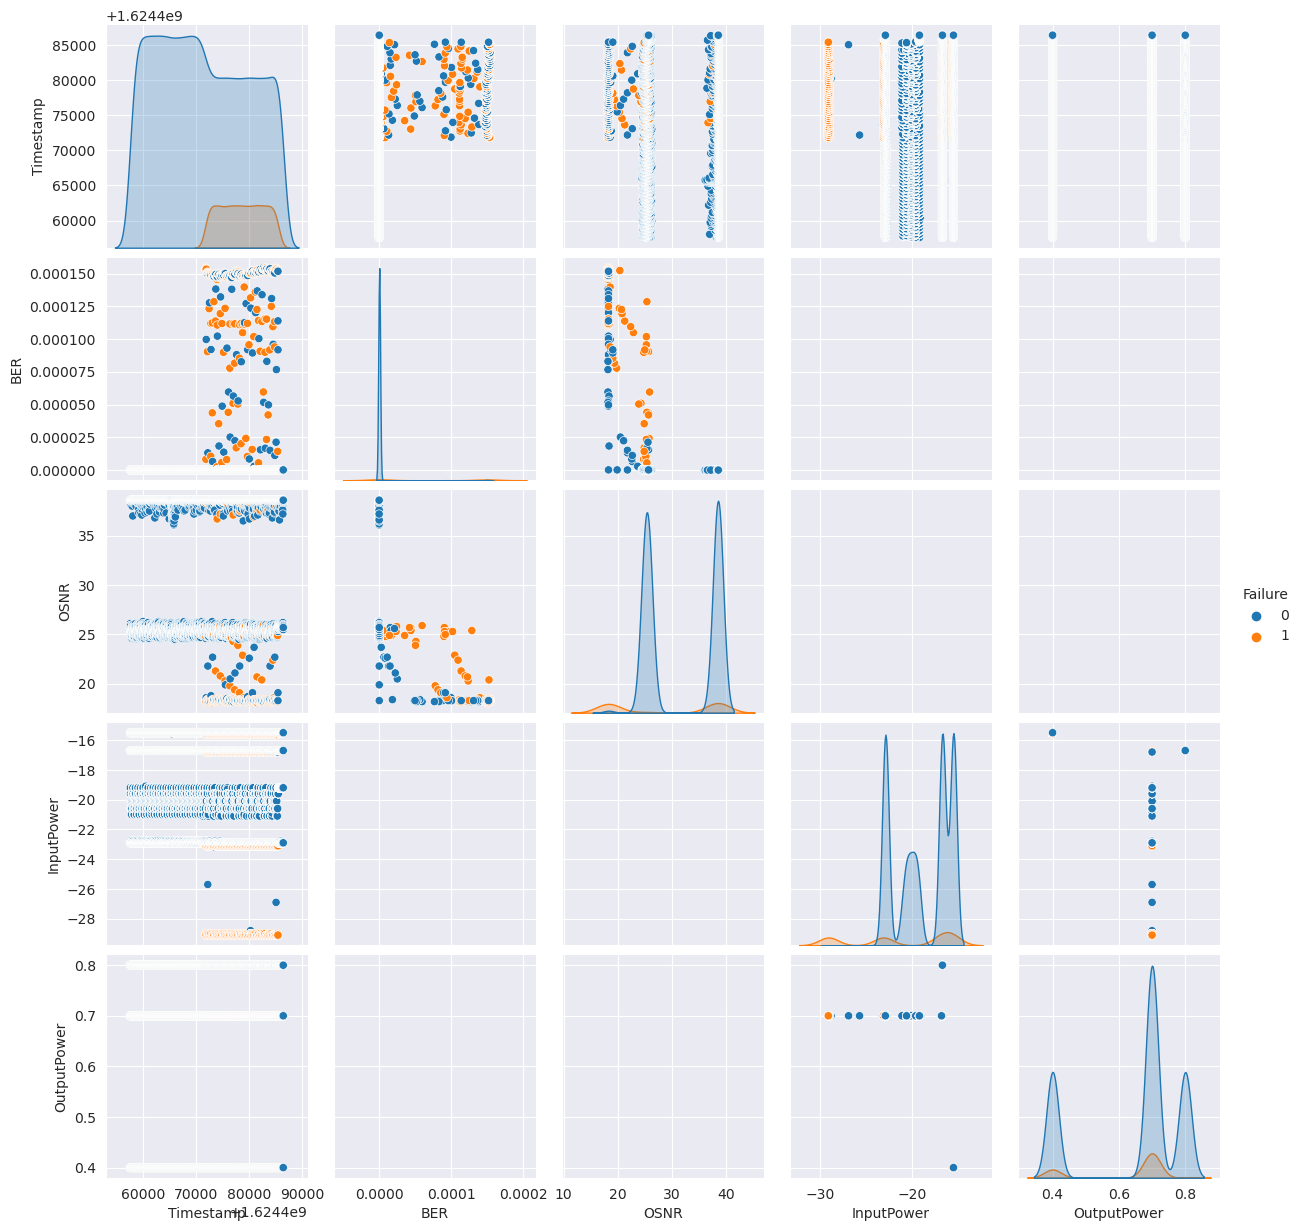

In [195]:
### Visualização das densidades e os espalhamentos

plt.figure(figsize=(5,5))
sns.pairplot(df_sf,hue="Failure", diag_kind='kde')

#### Seleção de um modelo

In [196]:
from sklearn.metrics import classification_report
from sklearn.tree    import DecisionTreeClassifier

### Cria o classificador
DTC = DecisionTreeClassifier(random_state=1)

### Treina o classificador
DTC.fit(X_train,y_train)

### Realzia a predição
y_pred_DTC  = DTC.predict(X_test)

### Avalai uma métrica de qualidade
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12176
           1       0.98      0.81      0.89      1249

    accuracy                           0.98     13425
   macro avg       0.98      0.91      0.94     13425
weighted avg       0.98      0.98      0.98     13425



In [197]:
from sklearn.ensemble    import RandomForestClassifier

### Cria o classificador
RFC     = RandomForestClassifier(random_state=1)

### Treina o classificador
RFC.fit(X_train,y_train)

### Realzia a predição
y_pred_RFC  = RFC.predict(X_test)

### Avalai uma métrica de qualidade
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12176
           1       0.98      0.81      0.89      1249

    accuracy                           0.98     13425
   macro avg       0.98      0.91      0.94     13425
weighted avg       0.98      0.98      0.98     13425



In [198]:
from sklearn.ensemble    import AdaBoostClassifier

### Cria o classificador
ABC     = RandomForestClassifier(random_state=1)

### Treina o classificador
ABC.fit(X_train,y_train)

### Realzia a predição
y_pred_ABC  = ABC.predict(X_test)

### Avalai uma métrica de qualidade
print(classification_report(y_test,y_pred_ABC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12176
           1       0.98      0.81      0.89      1249

    accuracy                           0.98     13425
   macro avg       0.98      0.91      0.94     13425
weighted avg       0.98      0.98      0.98     13425



In [199]:
import xgboost as xgb

### Cria o classificador
XGB     = xgb.XGBClassifier(random_state=1)

### Treina o classificador
XGB.fit(X_train,y_train)

### Realzia a predição
y_pred_XGB  = XGB.predict(X_test)

### Avalai uma métrica de qualidade
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12176
           1       0.98      0.83      0.89      1249

    accuracy                           0.98     13425
   macro avg       0.98      0.91      0.94     13425
weighted avg       0.98      0.98      0.98     13425



## **Random Forest**

<Axes: >

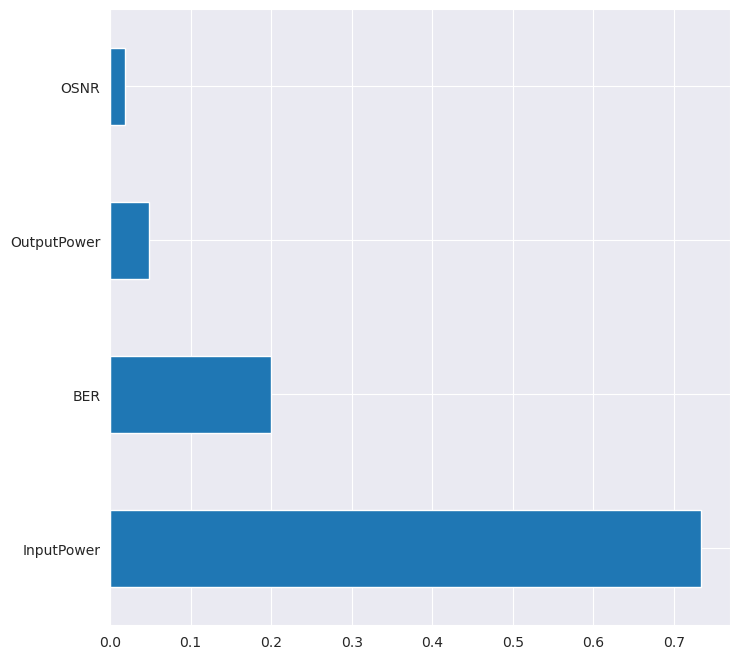

In [200]:
feat_importances = pd.Series(RFC.feature_importances_, index = X_features.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(8,8))

In [201]:
RFC.predict_proba(X_test)

array([[9.98060711e-01, 1.93928949e-03],
       [9.98060711e-01, 1.93928949e-03],
       [9.73839539e-01, 2.61604610e-02],
       ...,
       [9.32595286e-01, 6.74047144e-02],
       [9.99665762e-01, 3.34237703e-04],
       [9.99665762e-01, 3.34237703e-04]])

## **XGBOOST**


<Axes: >

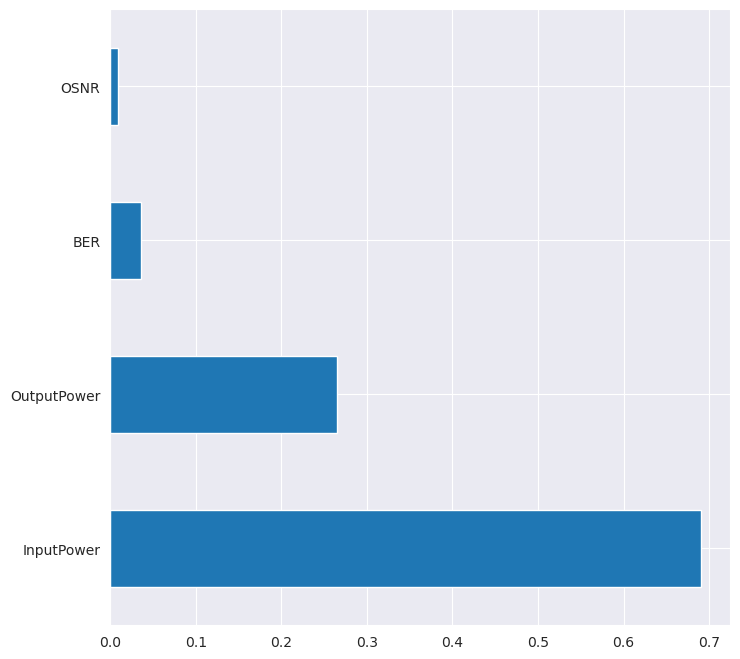

In [202]:
feat_importances = pd.Series(XGB.feature_importances_, index = X_features.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(8,8))

### Import Libs ML


In [203]:
from sklearn.model_selection import KFold
from sklearn import ensemble
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay

In [204]:
from sklearn.ensemble    import RandomForestClassifier

### Cria o classificador
RFC     = RandomForestClassifier(random_state=1)

### Treina o classificador
RFC.fit(X_train,y_train)

### Realzia a predição
y_pred_RFC  = RFC.predict(X_test)

### Avalai uma métrica de qualidade
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12176
           1       0.98      0.81      0.89      1249

    accuracy                           0.98     13425
   macro avg       0.98      0.91      0.94     13425
weighted avg       0.98      0.98      0.98     13425



In [205]:
RFC.predict_proba(X_test)

array([[9.98060711e-01, 1.93928949e-03],
       [9.98060711e-01, 1.93928949e-03],
       [9.73839539e-01, 2.61604610e-02],
       ...,
       [9.32595286e-01, 6.74047144e-02],
       [9.99665762e-01, 3.34237703e-04],
       [9.99665762e-01, 3.34237703e-04]])

<Axes: >

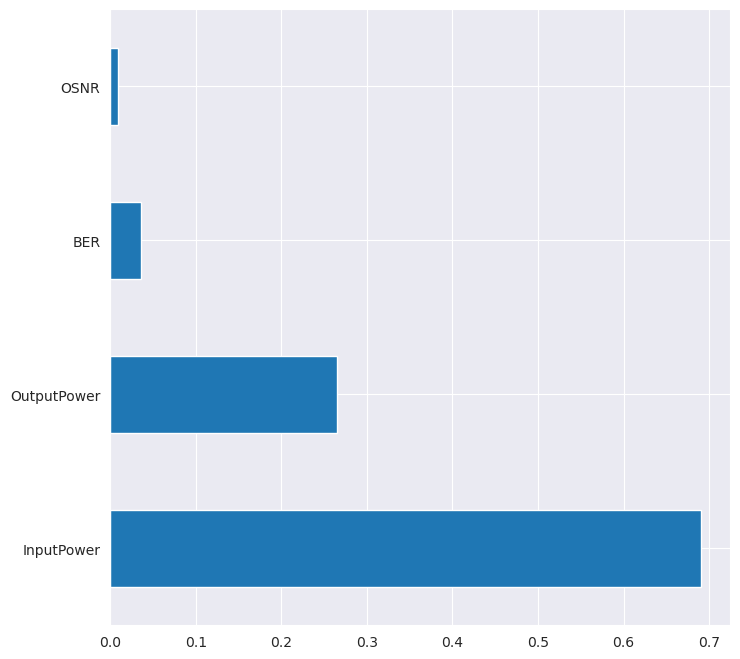

In [206]:
feat_importances = pd.Series(XGB.feature_importances_, index = X_features.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(8,8))

In [207]:
kf =KFold(n_splits=5, shuffle=True, random_state=50)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 32217, Test set:8055
Fold:2, Train set: 32217, Test set:8055
Fold:3, Train set: 32218, Test set:8054
Fold:4, Train set: 32218, Test set:8054
Fold:5, Train set: 32218, Test set:8054


In [208]:
# PCA com duas componentes principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_sf['pca_one'] = pca_result[:,0]
df_sf['pca_two'] = pca_result[:,1]

print('Variação explicada por componente principal: {}'.format(pca.explained_variance_ratio_))

Variação explicada por componente principal: [0.71697203 0.24436554]


<Axes: >

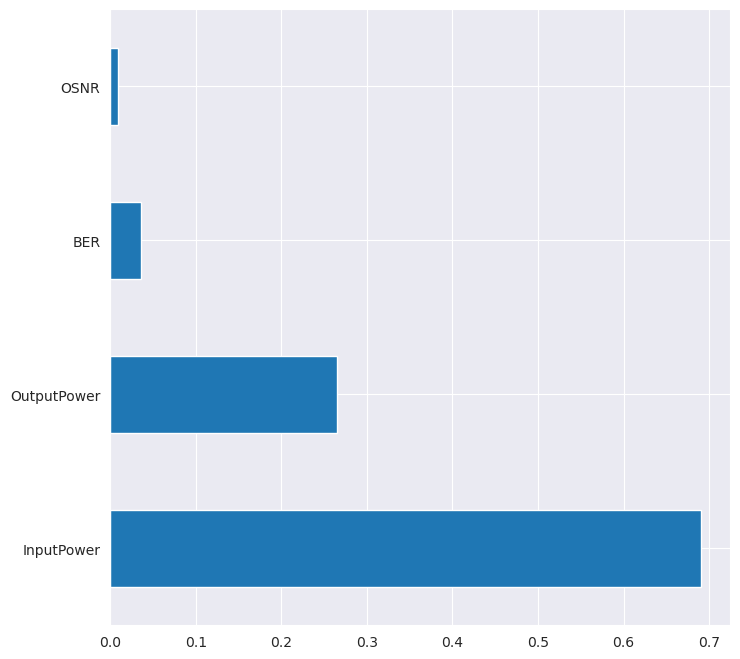

In [209]:
feat_importances = pd.Series(XGB.feature_importances_, index = X_features.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(8,8))

In [210]:
# Oversampling
smt = SMOTE(random_state=0)
X_over, y_over = smt.fit_resample(X_train, y_train)

In [211]:
xgboost = xgb.XGBClassifier(random_state=7)
xgboost.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [212]:
ss = StandardScaler()
X_treino_norm = ss.fit_transform(X_train)

In [213]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=50)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((42957, 4), (10740, 4), (42957,), (10740,))

In [214]:
# Normalizando dados de teste
X_teste_norm = ss.transform(X_teste)

In [215]:
eat_cols = ['pixel'+ str(i) for i in range(X.shape[1])] # Nomes das colunas

df_sf = pd.DataFrame(df_sf)
df_sf['y'] = y

df_sf['label'] = df_sf['y'].apply(lambda i: str(i)) # Label como string

X, y = None, None
print('Size of the dataframe: {}'.format(df_sf.shape))

Size of the dataframe: (53697, 15)


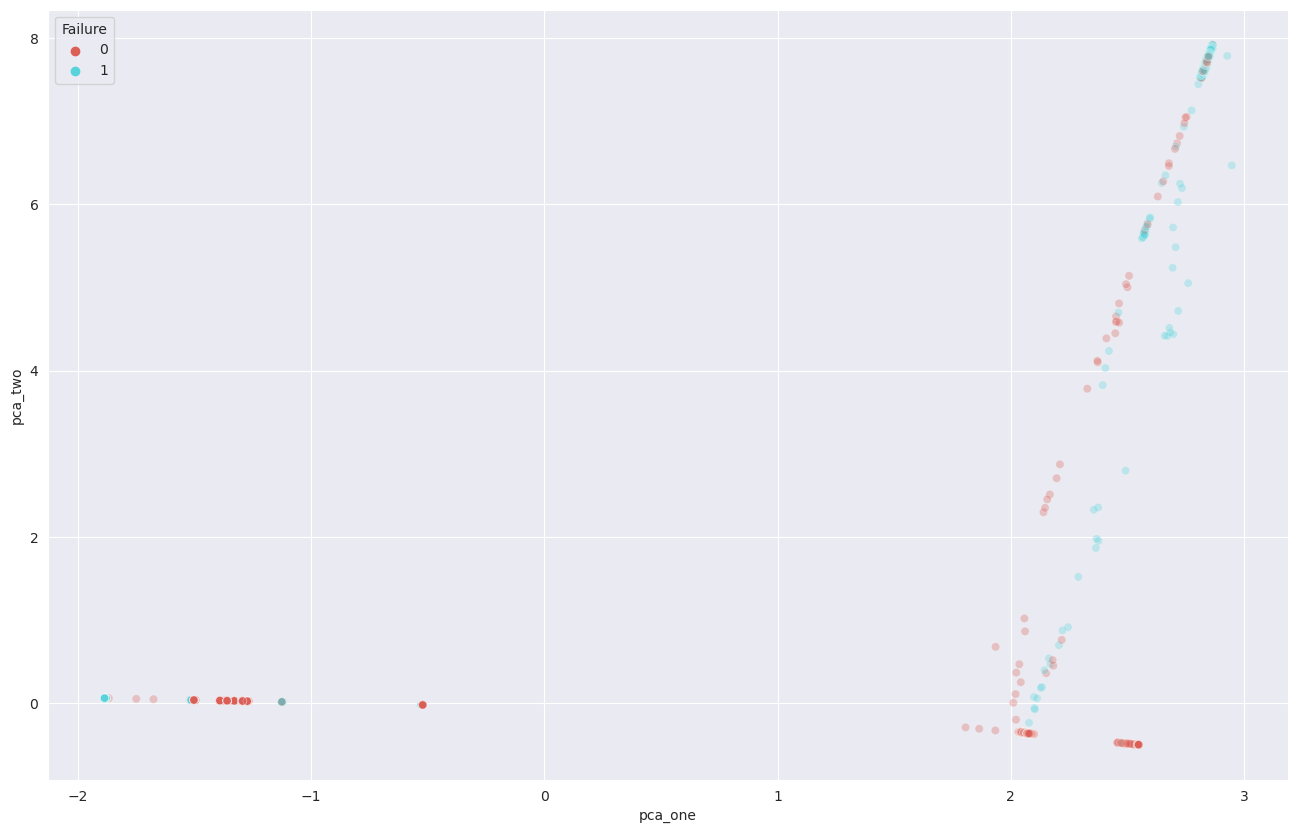

In [216]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_one", y="pca_two",
    palette=sns.color_palette("hls", 2),
    hue='Failure',
    data=df_sf,
    legend="full",
    alpha=0.3
)
plt.show()

In [217]:
# t-SNE com todas as colunas dos dados - 784 colunas para duas componentes
time_start = time.time()

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_sf.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True).drop(['Timestamp','Type','ID','Failure','Timestamp_s','Timestamp_data','Timestamp_hora'], axis=1))

print('Tempo gasto: {} segundos'.format(time.time()-time_start))

Tempo gasto: 55.065953731536865 segundos


In [218]:
# Salvando os resultados no dataset
df_sf['tsne_2d_one'] = tsne_results[:,0]
df_sf['tsne_2d_two'] = tsne_results[:,1]

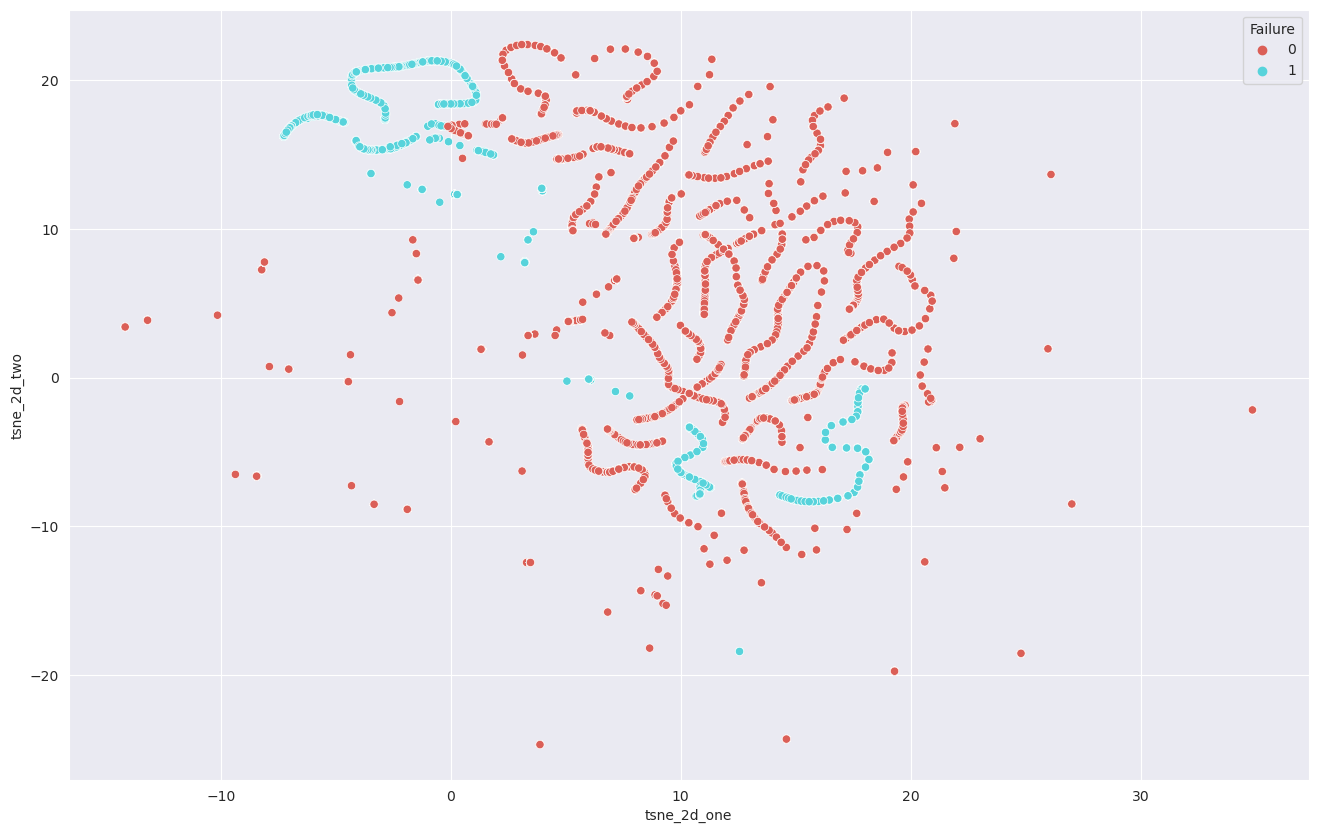

In [219]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    palette=sns.color_palette("hls", 2),
    hue='Failure',
    data=df_sf,
    legend="full"
)

plt.show()

### AUTOML

In [220]:
# Definindo colunas de features
feat_cols = df_sf.columns.tolist()
feat_cols.remove('Failure')

# Definindo o X e Y do problema
X, y = df_sf[feat_cols], df_sf[['Failure']]

# Segragating test and train dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [221]:
from flaml import AutoML

automl = AutoML()

automl_settings = {
    "time_budget": 10,
    "metric": 'mse',
    "task": 'regression',
    "log_file_name": 'flaml_log.log',
}

automl.fit(X_train=X_train, y_train=y_train['Failure'], **automl_settings)

[flaml.automl.logger: 04-26 21:04:17] {1680} INFO - task = regression
[flaml.automl.logger: 04-26 21:04:17] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-26 21:04:17] {1789} INFO - Minimizing error metric: mse
[flaml.automl.logger: 04-26 21:04:17] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 04-26 21:04:17] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-26 21:04:17] {2345} INFO - Estimated sufficient time budget=920s. Estimated necessary time budget=6s.
[flaml.automl.logger: 04-26 21:04:17] {2392} INFO -  at 0.4s,	estimator lgbm's best error=0.0329,	best estimator lgbm's best error=0.0329
[flaml.automl.logger: 04-26 21:04:17] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-26 21:04:17] {2392} INFO -  at 0.5s,	estimator lgbm's best error=0.0329,	best estimator lgbm's best error=0.0329
[flaml.automl.logger: 04-26 21:04:17] {2219} INFO 

In [222]:
y_auto_ml = automl.predict(X_test)

In [223]:
print(f"MAE: {mean_absolute_error(y_test, y_auto_ml)}")
print(f"MSE: {mean_squared_error(y_test, y_auto_ml)}")
print(f"R2: {r2_score(y_test, y_auto_ml)}")

MAE: 0.0
MSE: 0.0
R2: 1.0
